## CDC/ATSDR Social Vulnerability Index 2020 

### Introduction

**What is Social Vulnerability?**
Every community must prepare for and respond to hazardous events, whether a natural disaster like a tornado or a disease outbreak, or an anthropogenic event such as a harmful chemical spill. The degree to which a community exhibits certain social conditions, including high poverty, low percentage of vehicle access, or crowded households, may affect that community’s ability to prevent human suffering and financial loss in the event of disaster. These factors describe a community’s social vulnerability.

**What is Social Vulnerability Index?**
SVI indicates the relative vulnerability of every U.S. Census tract. Census tracts are subdivisions of counties for which the Census collects statistical data. SVI ranks the tracts on 16 social factors, including unemployment, racial and ethnic minority status, and disability, and further groups them into four related themes. Thus, each tract receives a ranking for each Census variable and for each of the four themes as well as an overall ranking.

**How can SVI help communities be better prepared for hazardous events?**
SVI provides specific socially and spatially relevant information to help public health officials and local planners better prepare communities to respond to emergency events such as severe weather, floods, disease outbreaks, or chemical exposure.

### Objectives

1. Identify areas of high social vulnerability using the SVI to identify and visualize areas with a high index of social vulnerability. This can help local authorities and planners focus their efforts on preparation and response in these areas.

2. Develop a predictive model using machine learning techniques that relate SVI to the probability of hazardous events, this can assist in the early identification of high-risk areas.

### Variables of interest
STATE	    State name
EP_POV150 	Percentage of persons below 150% poverty estimate
EP_UNEMP 	Unemployment Rate estimate 
EP_NOHSDP 	Percentage of persons with no high school diploma (age 25+) estimate 
EP_AGE65 	Percentage of persons aged 65 and older estimate, 2016-2020 ACS 
EP_AGE17 	Percentage of persons aged 17 and younger estimate, 2016-2020 ACS 
EP_SNGPNT 	Percentage of single-parent households with children under 18 estimate, 2016-2020 ACS 
EP_LIMENG 	Percentage of persons (age 5+) who speak English "less than well" estimate, 2016-2020 ACS 
EP_MOBILE 	Percentage of mobile homes estimate 
EP_NOVEH 	Percentage of households with no vehicle available estimate 
API_NOIN    Percentage of persons withot health insurance

### Hypothesis

**Null Hypothesis** (H0): There is no significant relationship between the independent variables (EP_NOHSDP, EP_UNEMP, EP_AGE65, EP_AGE17, EP_SNGPNT, EP_LIMENG, EP_MOBILE, EP_NOVEH) and the dependent variable (EP_POV150). 

**Alternative Hypothesis** (H1): There is a significant relationship between at least one of the independent variables and the dependent variable. In other words, at least one of the independent variables has a significant impact on the dependent variable.





In [24]:
variable_dict = {
    'STATE': 'State name',
    'EP_POV150': 'Percentage of persons below 150% poverty estimate',
    'EP_UNEMP': 'Unemployment Rate estimate',
    'EP_NOHSDP': 'Percentage of persons with no high school diploma (age 25+) estimate',
    'EP_AGE65': 'Percentage of persons aged 65 and older estimate, 2016-2020 ACS',
    'EP_AGE17': 'Percentage of persons aged 17 and younger estimate, 2016-2020 ACS',
    'EP_SNGPNT': 'Percentage of single-parent households with children under 18 estimate, 2016-2020 ACS',
    'EP_LIMENG': 'Percentage of persons (age 5+) who speak English "less than well" estimate, 2016-2020 ACS',
    'EP_MOBILE': 'Percentage of mobile homes estimate',
    'EP_NOVEH': 'Percentage of households with no vehicle available estimate',
    'API_NOIN': 'Percentage of persons without health insurance'
}


In [25]:
import pandas as pd

url ='C:\\Users\\52444\\Desktop\\Data Science\\DataScienceCoder\\Data Sets\\SVI_2020_US_county.csv'
dfSVI = pd.read_csv(url)
dfSVI.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,1,Alabama,AL,1001,Autauga,1001,"Autauga County, Alabama",594.455838,55639,0,...,1.2,0.3,0.3,0.2,0.0,0.1,2.0,0.7,0.2,0.3
1,1,Alabama,AL,1003,Baldwin,1003,"Baldwin County, Alabama",1589.835294,218289,0,...,0.9,0.2,0.6,0.2,0.0,0.1,1.9,0.4,0.3,0.2
2,1,Alabama,AL,1005,Barbour,1005,"Barbour County, Alabama",885.007618,25026,0,...,0.5,0.1,0.3,0.3,0.0,0.1,1.3,0.6,0.6,0.4
3,1,Alabama,AL,1007,Bibb,1007,"Bibb County, Alabama",622.469288,22374,0,...,0.3,0.4,0.1,0.1,0.0,0.2,0.4,0.3,0.0,0.2
4,1,Alabama,AL,1009,Blount,1009,"Blount County, Alabama",644.890375,57755,0,...,0.4,0.1,0.1,0.1,0.1,0.1,1.8,0.3,0.3,0.4


In [26]:
import requests

# Definir la URL de la API
url = "https://api.census.gov/data/timeseries/healthins/sahie?get=NAME,PCTIC_LB90&for=county:*&time=2020&key=7cef749358cb143c0760b345e66bcf67b4623955"

# Hacer la solicitud GET a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Convertir la respuesta a formato JSON
    data = response.json()
    
    # Crear un DataFrame de pandas con los datos
    df = pd.DataFrame(data[1:], columns=data[0])
    
    # Imprimir la tabla
    display(df)
else:
    # Imprimir un mensaje de error si la solicitud no fue exitosa
    print(f"Error en la solicitud. Código de estado: {response.status_code}")

,NAME,PCTIC_LB90,time,state,county
0,"Autauga County, AL",88.1,2020,01,001
1,"Baldwin County, AL",87.9,2020,01,003
2,"Barbour County, AL",83.7,2020,01,005
3,"Bibb County, AL",85.3,2020,01,007
4,"Blount County, AL",85.2,2020,01,009
...,...,...,...,...,...
3138,"Sweetwater County, WY",84.6,2020,56,037
3139,"Teton County, WY",83.6,2020,56,039
3140,"Uinta County, WY",84.4,2020,56,041
3141,"Washakie County, WY",82.1,2020,56,043


In [27]:
df['state'] = df['state'].astype(str).str.lstrip('0')

df['FIPS'] = df['state'] + df['county']

df['API_NOIN'] = 100 - df['PCTIC_LB90'].astype(float)

print(df)

                       NAME PCTIC_LB90  time state county   FIPS  API_NOIN
0        Autauga County, AL       88.1  2020     1    001   1001      11.9
1        Baldwin County, AL       87.9  2020     1    003   1003      12.1
2        Barbour County, AL       83.7  2020     1    005   1005      16.3
3           Bibb County, AL       85.3  2020     1    007   1007      14.7
4         Blount County, AL       85.2  2020     1    009   1009      14.8
...                     ...        ...   ...   ...    ...    ...       ...
3138  Sweetwater County, WY       84.6  2020    56    037  56037      15.4
3139       Teton County, WY       83.6  2020    56    039  56039      16.4
3140       Uinta County, WY       84.4  2020    56    041  56041      15.6
3141    Washakie County, WY       82.1  2020    56    043  56043      17.9
3142      Weston County, WY       85.0  2020    56    045  56045      15.0

[3143 rows x 7 columns]


In [5]:
# Convertir la columna FIPS a tipo string en ambos DataFrames
df['FIPS'] = df['FIPS'].astype(str)
dfSVI['FIPS'] = dfSVI['FIPS'].astype(str)

# Crear el nuevo DataFrame dfINDEX
dfINDEX = pd.merge(df, dfSVI, on='FIPS')

# Seleccionar las columnas deseadas
columns_to_select = ['FIPS', 'API_NOIN', 'EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']
dfINDEX = dfINDEX[columns_to_select]

print(dfINDEX)


       FIPS  API_NOIN  EP_POV150  EP_UNEMP  EP_NOHSDP  EP_AGE65  EP_AGE17  \
0      1001      11.9       22.9       2.9       11.3      15.3      23.6   
1      1003      12.1       16.9       3.9        9.5      20.5      21.5   
2      1005      16.3       40.6       6.9       25.3      19.1      20.9   
3      1007      14.7       27.6       7.4       19.1      16.4      20.5   
4      1009      14.8       23.8       5.2       17.2      18.0      23.2   
...     ...       ...        ...       ...        ...       ...       ...   
3138  56037      15.4       18.0       6.2        7.4      12.2      26.1   
3139  56039      16.4       11.9       1.8        5.3      14.9      17.9   
3140  56041      15.6       18.2       4.5        6.9      14.1      28.8   
3141  56043      17.9       19.2       4.2        8.0      21.6      23.8   
3142  56045      15.0       20.3       3.9        6.7      20.3      19.3   

      EP_SNGPNT  EP_LIMENG  EP_MOBILE  EP_NOVEH  
0           7.5        0.

In [28]:
# Verificar si hay valores en blanco en el DataFrame
valores_en_blanco = dfINDEX.isnull().any()

# Filtrar las filas con valores en blanco en la columna API_NOIN
filas_con_valores_en_blanco = dfINDEX[dfINDEX['API_NOIN'].isnull()]
print("Filas con valores en blanco en la columna API_NOIN:")
print(filas_con_valores_en_blanco)


Filas con valores en blanco en la columna API_NOIN:
Empty DataFrame
Columns: [FIPS, API_NOIN, EP_POV150, EP_UNEMP, EP_NOHSDP, EP_AGE65, EP_AGE17, EP_SNGPNT, EP_LIMENG, EP_MOBILE, EP_NOVEH]
Index: []


In [29]:
# Reemplazar NaN con cero en la columna API_NOIN
dfINDEX['API_NOIN'].fillna(0, inplace=True)
print(dfINDEX)


       FIPS  API_NOIN  EP_POV150  EP_UNEMP  EP_NOHSDP  EP_AGE65  EP_AGE17  \
0      1001      11.9       22.9       2.9       11.3      15.3      23.6   
1      1003      12.1       16.9       3.9        9.5      20.5      21.5   
2      1005      16.3       40.6       6.9       25.3      19.1      20.9   
3      1007      14.7       27.6       7.4       19.1      16.4      20.5   
4      1009      14.8       23.8       5.2       17.2      18.0      23.2   
...     ...       ...        ...       ...        ...       ...       ...   
3138  56037      15.4       18.0       6.2        7.4      12.2      26.1   
3139  56039      16.4       11.9       1.8        5.3      14.9      17.9   
3140  56041      15.6       18.2       4.5        6.9      14.1      28.8   
3141  56043      17.9       19.2       4.2        8.0      21.6      23.8   
3142  56045      15.0       20.3       3.9        6.7      20.3      19.3   

      EP_SNGPNT  EP_LIMENG  EP_MOBILE  EP_NOVEH  
0           7.5        0.

### Descriptive Charts

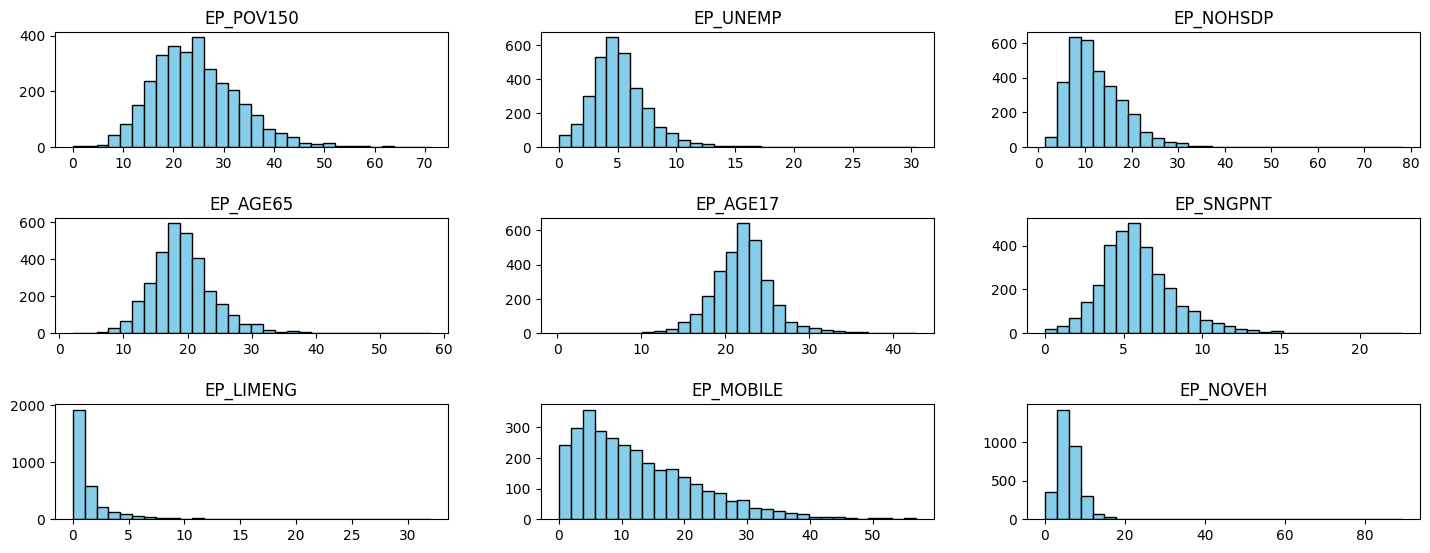

In [30]:
import matplotlib.pyplot as plt

# Selecciona las columnas que deseas visualizar en dfINDEX
columns_to_plot = ['EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']

# Calcula el número de filas necesarias para acomodar todas las columnas
num_rows = (len(columns_to_plot) + 2) // 3  # Suma 2 para redondear hacia arriba en caso de no ser divisible por 3

# Configura subgráficos para cada columna
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 2 * num_rows))
fig.tight_layout(pad=3.0)

# Genera histogramas para cada columna en dfINDEX
for i, col in enumerate(columns_to_plot):
    ax_row, ax_col = divmod(i, 3)
    axes[ax_row, ax_col].hist(dfINDEX[col], bins=30, color='skyblue', edgecolor='black')
    axes[ax_row, ax_col].set_title(col)

plt.show()


In the histograms it is possible to see that 3 characteristics ( 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH') do not have a normal distribution. So a logarithmic transformation will be applied to see if it improves the distribution.

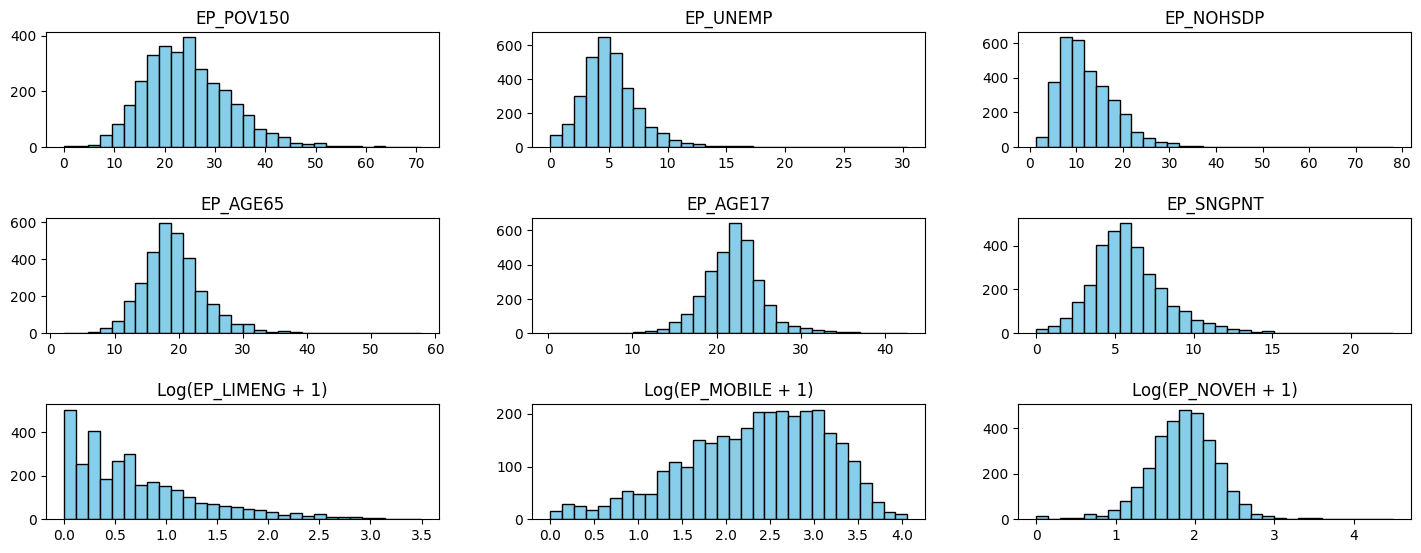

In [31]:
import numpy as np

# Selecciona las columnas que deseas visualizar en dfINDEX
columns_to_plot = ['EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']

# Calcula el número de filas necesarias para acomodar todas las columnas
num_rows = (len(columns_to_plot) + 2) // 3  # Suma 2 para redondear hacia arriba en caso de no ser divisible por 3

# Configura subgráficos para cada columna
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 2 * num_rows))
fig.tight_layout(pad=3.0)

# Genera histogramas para cada columna en dfINDEX
for i, col in enumerate(columns_to_plot):
    ax_row, ax_col = divmod(i, 3)
    
    # Aplica la transformación logarítmica a las características específicas
    if col in ['EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']:
        axes[ax_row, ax_col].hist(np.log1p(dfINDEX[col]), bins=30, color='skyblue', edgecolor='black')
        axes[ax_row, ax_col].set_title(f'Log({col} + 1)')  # Agrega 1 para evitar el logaritmo de cero
    else:
        axes[ax_row, ax_col].hist(dfINDEX[col], bins=30, color='skyblue', edgecolor='black')
        axes[ax_row, ax_col].set_title(col)

plt.show()


The EP_LIMENG characteristic did not improve with the logarithmic transformation, so we will try to apply the Box-Cox transformation and see if it improves the normality.

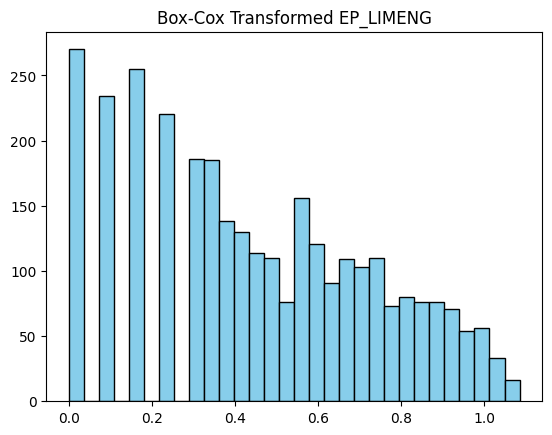

In [32]:
from scipy.stats import boxcox

# Aplica la transformación de Box-Cox a 'EP_LIMENG'
transformed_data, lambda_value = boxcox(dfINDEX['EP_LIMENG'] + 1)  # Agrega 1 para evitar el logaritmo de cero

# Visualiza el histograma de los datos transformados
plt.hist(transformed_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Box-Cox Transformed EP_LIMENG')
plt.show()


Even though it is not a strictly normal distribution, we will use the BOX COX transformation for this characteristic because it improved its normality. 

In [33]:
# Selecciona las características que deseas en dfINDEX
selected_features = ['FIPS', 'API_NOIN', 'EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']

# Copia las columnas seleccionadas de dfINDEX a un nuevo DataFrame
dfINDEX_transformed = dfINDEX[selected_features].copy()

# Aplica la transformación logarítmica a 'EP_MOBILE' y 'EP_NOVEH'
dfINDEX_transformed['EP_MOBILE'] = np.log1p(dfINDEX_transformed['EP_MOBILE'])
dfINDEX_transformed['EP_NOVEH'] = np.log1p(dfINDEX_transformed['EP_NOVEH'])

# Aplica la transformación de Box-Cox a 'EP_LIMENG'
dfINDEX_transformed['EP_LIMENG'], lambda_value = boxcox(dfINDEX_transformed['EP_LIMENG'] + 1)  # Agrega 1 para evitar el logaritmo de cero

# Verifica el resultado
print(dfINDEX_transformed.head())


   FIPS  API_NOIN  EP_POV150  EP_UNEMP  EP_NOHSDP  EP_AGE65  EP_AGE17  \
0  1001      11.9       22.9       2.9       11.3      15.3      23.6   
1  1003      12.1       16.9       3.9        9.5      20.5      21.5   
2  1005      16.3       40.6       6.9       25.3      19.1      20.9   
3  1007      14.7       27.6       7.4       19.1      16.4      20.5   
4  1009      14.8       23.8       5.2       17.2      18.0      23.2   

   EP_SNGPNT  EP_LIMENG  EP_MOBILE  EP_NOVEH  
0        7.5   0.424065   2.954910  1.856298  
1        3.9   0.459030   2.415914  1.410987  
2       11.0   0.677428   3.440418  2.493205  
3       10.9   0.291276   3.493473  2.028148  
4        6.2   0.629224   3.250374  1.808289  


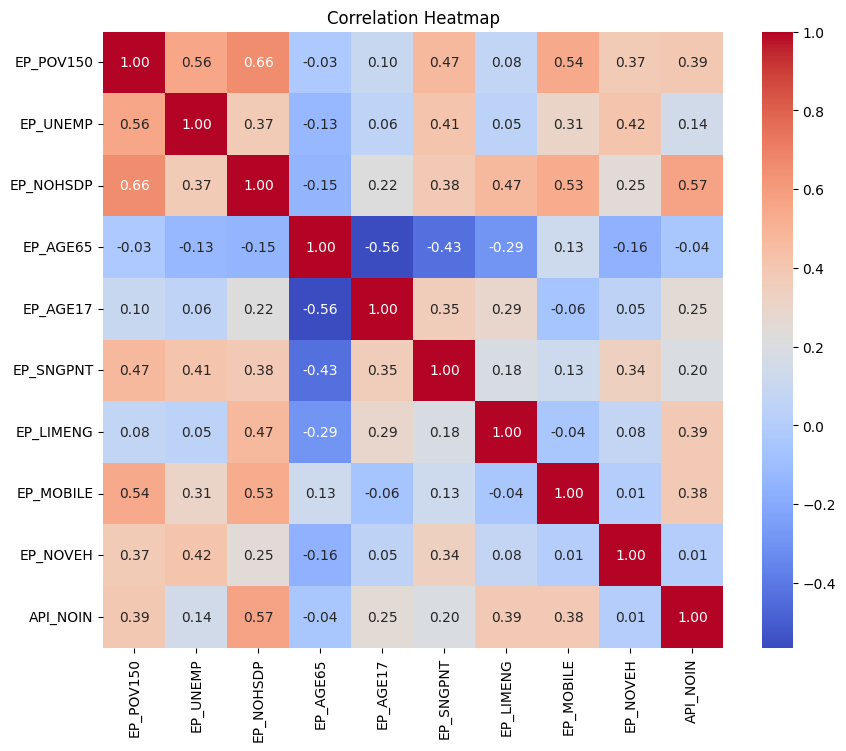

In [34]:
import seaborn as sns

# Calcula la matriz de correlación
correlation_matrix = dfINDEX[['EP_POV150', 'EP_UNEMP', 'EP_NOHSDP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH', 'API_NOIN']].corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


When looking at the correlation matrix we can see that the variables that have the greatest influence on the persons below 150% poverty EP_POV150 are: EP_UNEMP, EP_NOHSDP, EP_SNGPNT, EP_MOBILE

So we will start by fitting a linear model of EP_POV150 vs EP_NOHSDP which are the parameters showing the strongest correlation.

### LINEAL REGRESION

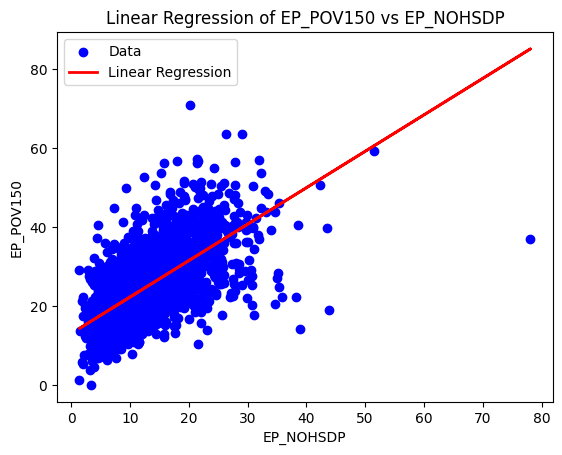

Coeficiente de la pendiente (slope): 0.92
Coeficiente de la intersección (intercept): 13.04
Coeficiente de determinación (R^2): 0.43024924071334925
Error cuadrático medio (MSE): 41.211933159176745


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Datos de entrada (variables independiente y dependiente)
X = dfINDEX['EP_NOHSDP'].values.reshape(-1, 1)  # Variable independiente (EP_NOHSDP)
y = dfINDEX['EP_POV150'].values  # Variable dependiente (EP_POV150)

# Crear y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, y)

# Realizar predicciones
y_pred = regression_model.predict(X)

# Calcular los coeficientes de la regresión
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Visualizar la regresión
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('EP_NOHSDP')
plt.ylabel('EP_POV150')
plt.legend()
plt.title('Linear Regression of EP_POV150 vs EP_NOHSDP')
plt.show()
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'Coeficiente de la pendiente (slope): {slope:.2f}')
print(f'Coeficiente de la intersección (intercept): {intercept:.2f}')
print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)

Looking at the graph it is possible to see at a very early glance that the data does not fit well into a linear regression, yet we will use a feature selection to identify and choose a subset of the most relevant characteristics to predict the dependent variable.

FORWARD SELECTION

In [36]:
from itertools import combinations


X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_AGE65', 'EP_AGE17', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MOBILE', 'EP_NOVEH']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Inicializa una lista para realizar un seguimiento de las características seleccionadas
selected_features = []

# Inicializa el mejor MSE con un valor alto
best_mse = float('inf')

# Crea un bucle para agregar características de manera iterativa
for _ in range(X.shape[1]):
    candidate_features = [feature for feature in X.columns if feature not in selected_features]
    current_best_mse = best_mse
    best_feature = None

    for feature in candidate_features:
        features_to_test = selected_features + [feature]
        X_subset = X[features_to_test]
        model = LinearRegression()
        model.fit(X_subset, y)
        y_pred = model.predict(X_subset)
        mse = mean_squared_error(y, y_pred)

        if mse < current_best_mse:
            current_best_mse = mse
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        best_mse = current_best_mse
    else:
        break

# Muestra las características seleccionadas
print("Selected_features:", selected_features)

# Crea y entrena un modelo final con las características seleccionadas
final_features = X[selected_features]
final_model = LinearRegression()
final_model.fit(final_features, y)

Selected_features: ['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']


LinearRegression()

The forward selection results show that the most significant features are actually all of them. In addition, when doing each regression manually, it can also be observed that the R2 value decreases as we use fewer features. 

CROSS-VALIDATION

In [37]:
from sklearn.model_selection import cross_val_score, KFold

# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Configurar la validación cruzada con 5 divisiones (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada y calcular R-cuadrado en cada iteración
scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

print("R2:", scores)
print("R2 mean:", scores.mean())

R2: [0.63408923 0.66180378 0.6206862  0.6916583  0.61778849]
R2 mean: 0.6452052003268001


The validation results indicate that the model explains, on average, about 64.52% of the variation in the dependent variable (EP_POV150).
It is a low value, so we will continue to use another algorithm in order to find a better fit. 

### K-NN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Crear un modelo de K-NN con, por ejemplo, k=5 (número de vecinos)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X, y)

# Realizar predicciones en los datos de prueba (o en nuevos datos)
y_pred = knn_model.predict(X)

# Calcular métricas de rendimiento
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 15.189078841870824
Coeficiente de determinación (R^2): 0.7900125390964898


CROSS-VALIDATION

In [39]:

from sklearn.model_selection import cross_val_score, KFold


# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Crea un modelo de K-NN con un valor inicial de k
knn_model = KNeighborsRegressor(n_neighbors=5)

# Configura la validación cruzada con 5 divisiones (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada y calcula la métrica de rendimiento, como el coeficiente de determinación (R^2)
scores = cross_val_score(knn_model, X, y, scoring='r2', cv=kf)

# Imprime los resultados de validación cruzada
print("Resultados de validación cruzada (R^2):", scores)
print("R^2 medio:", scores.mean())

Resultados de validación cruzada (R^2): [0.68408772 0.68104595 0.64976607 0.68236503 0.64422851]
R^2 medio: 0.668298657467336


The KNN results show a low MSE and a high R^2 which are indicative of a good fit of the model to the data. An R^2 of 0.79 suggests that the K-NN model is able to explain a significant part of the variability in the dependent variable EP_POV150. 

For cross-validation the average R^2 is about 0.668, indicating that the K-NN model performs on average about 66.83% across all cross-validation data splits.

This result indicates that the data have a better fit with a K-NN regression than with a linear regression.

### RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X, y)

# Obtener la importancia de las características
feature_importance = rf_model.feature_importances_

# Imprimir la importancia de las características
print("Importance of the features:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")


Importance of the features:
EP_NOHSDP: 0.4472649474019864
EP_UNEMP: 0.13075238435475567
EP_LIMENG: 0.03311374100727526
EP_SNGPNT: 0.06137750846080839
EP_MOBILE: 0.08955854147745844
EP_NOVEH: 0.13320938327252685
EP_AGE65: 0.05594031804756945
EP_AGE17: 0.048783175977619664


### KNN 
With the top 3 selected variables based on the random forest regressor

In [41]:
# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_NOVEH']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Crear un modelo de K-NN con, por ejemplo, k=5 (número de vecinos)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X, y)

# Realizar predicciones en los datos de prueba (o en nuevos datos)
y_pred = knn_model.predict(X)

# Calcular métricas de rendimiento
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 21.47607534202991
Coeficiente de determinación (R^2): 0.7030954557419435


CROSS-VALIDATION

In [42]:
# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_NOVEH']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Crea un modelo de K-NN con un valor inicial de k
knn_model = KNeighborsRegressor(n_neighbors=5)

# Configura la validación cruzada con 5 divisiones (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada y calcula la métrica de rendimiento, como el coeficiente de determinación (R^2)
scores = cross_val_score(knn_model, X, y, scoring='r2', cv=kf)

# Imprime los resultados de validación cruzada
print("Resultados de validación cruzada (R^2):", scores)
print("R^2 medio:", scores.mean())

Resultados de validación cruzada (R^2): [0.56821941 0.56757854 0.55189779 0.5841687  0.5116275 ]
R^2 medio: 0.5566983867766393


After using the 3 most significant variables obtained by means of a random forest regressor we can observe that neither the value of the KNN nor the cross-validation results are better than the values obtained using all our features. 

### XBOOST 

KFOLD VALIDATION

In [43]:
import xgboost as xgb

# Variables independientes
X = dfSVI[['EP_NOHSDP', 'EP_UNEMP', 'EP_LIMENG', 'EP_SNGPNT', 'EP_MOBILE', 'EP_NOVEH', 'EP_AGE65', 'EP_AGE17']]

# Variable dependiente
y = dfSVI['EP_POV150']

# Configurar los hiperparámetros de XGBoost
params = {
    'objective': 'reg:squarederror',  # Problema de regresión
    'max_depth': 3,                 # Profundidad máxima del árbol
    'n_estimators': 100,             # Número de árboles (estimadores)
    'learning_rate': 0.1            # Tasa de aprendizaje
}

# Configurar la validación cruzada con 5 divisiones (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar listas para almacenar las métricas de rendimiento
mse_scores = []
r2_scores = []

# Realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y ajustar el modelo XGBoost
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada (MSE):", mse_scores)
print("MSE medio:", np.mean(mse_scores))
print("Resultados de validación cruzada (R^2):", r2_scores)
print("R^2 medio:", np.mean(r2_scores))


Resultados de validación cruzada (MSE): [23.084069814896058, 22.510235352154726, 23.274792214538262, 21.08838915805771, 21.016065917690565]
MSE medio: 22.194710491467465
Resultados de validación cruzada (R^2): [0.6832614300380465, 0.7135464691693509, 0.6874353053909549, 0.7207792800728844, 0.648752863215351]
R^2 medio: 0.6907550695773175


The average MSE performance and the Coefficient of Determination R^2 indicate that the XGBoost model has an overall positive performance based on the KFold cross-validation metrics. The mean MSE of 22.19 shows that the predictions tend to deviate on average by that amount. The average R^2 of about 0.691 suggests that the model explains about 69.1% of the variability in the dependent variable EP_POV150.

The mean MSE of about 22.19 is reasonable, and the MSEs in the test divisions are not significantly higher than in the training divisions. This suggests that there is no clear indication of overfitting or underfitting.

The mean R^2 of about 0.691 indicates that the model explains about 69.1% of the variability in the dependent variable on average, suggesting a reasonable fit.

### CONCLUSION

First of all, the Null Hypothesis (H0) is rejected because all the independent variables have a significant relationship with the independent variable. 
Speaking in terms of this study, it means that the Percentage of persons below 150% poverty estimate is strongly related to the rest of the variables. 

In conclusion, and taking into account all the algorithms and methods used in this work, it can be concluded that the method that best fits the variables established in this data frame is XGBoost, with the best results in cross-validation of both MSE and R2.